<a href="https://colab.research.google.com/github/AIsavvyAyeshafathima/ENERGY-BASED-MODELS/blob/main/ENERGY_BASESD_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENERGY-BASED MODELS

**Step 1: Set Up the MNIST Dataset**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to [0, 1] range and reshape it for the model
x_train = (x_train.astype('float32') / 255.0).reshape(-1, 28 * 28)
x_test = (x_test.astype('float32') / 255.0).reshape(-1, 28 * 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Step 2: Build the Energy Function Neural Network**

In [7]:
from tensorflow.keras import layers, models

# Define the energy function as a neural network
def build_energy_network(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_normal'))  # Hidden layer
    model.add(layers.Dense(1))  # Output layer representing energy
    return model

input_shape = (28 * 28,)  # MNIST images are 28x28 pixels
energy_model = build_energy_network(input_shape)
energy_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

**Step 3: Define Contrastive Divergence (CD) Loss**


In [8]:
import numpy as np

def contrastive_divergence(model, data, k=1):
    # Gibbs sampling initialization with real data
    positive_sample = data

    # Gibbs sampling for negative samples
    negative_sample = data
    for _ in range(k):
        # Add noise for negative sample generation
        negative_sample = tf.random.uniform(tf.shape(negative_sample), minval=0.0, maxval=1.0)

    # Energy calculation
    positive_energy = tf.reduce_mean(model(positive_sample))
    negative_energy = tf.reduce_mean(model(negative_sample))

    # Contrastive Divergence loss
    loss = positive_energy - negative_energy
    return loss


**Step 4: Build a Custom Keras Model for Training**

In [9]:
class EBMModel(tf.keras.Model):
    def __init__(self, energy_model):
        super(EBMModel, self).__init__()
        self.energy_model = energy_model

    def train_step(self, data):
        with tf.GradientTape() as tape:
            loss = contrastive_divergence(self.energy_model, data)

        # Apply gradients to update the model
        gradients = tape.gradient(loss, self.energy_model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.energy_model.trainable_variables))

        return {"loss": loss}

# Instantiate the custom EBM model
ebm_model = EBMModel(energy_model)
ebm_model.compile(optimizer=tf.keras.optimizers.Adam())


**Step 5: Train the Model for 120 Epochs**

In [10]:
# Train the model
history = ebm_model.fit(x_train, epochs=120, batch_size=64)


Epoch 1/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: -16142.7949
Epoch 2/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -106780.0000
Epoch 3/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: -268166.9375
Epoch 4/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -486225.6250
Epoch 5/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -753821.2500
Epoch 6/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -1066966.3750
Epoch 7/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -1423689.5000
Epoch 8/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -1823396.3750
Epoch 9/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -2265058.0000
Epoch 10/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -2747173.5000
Epoch 11/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: -3272110.0000
Epoch 12/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -3836746.2500
Epoch 13/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -4442392.0000
Epoch 14/120
938/938 ━━━━━━

**Step 6: Plot the Loss Curve**

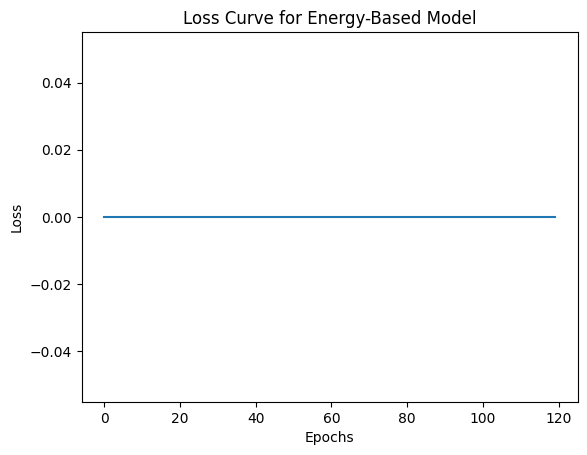

In [11]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(history.history['loss'])
plt.title('Loss Curve for Energy-Based Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [15]:
import numpy as np

def compute_validation_loss(model, noise_size=1000):
    # Generate random noise
    random_noise = np.random.uniform(0, 1, size=(noise_size, 28 * 28)).astype('float32')

    # Calculate contrastive divergence for random noise
    noise_loss = contrastive_divergence(model.energy_model, random_noise)

    return noise_loss


In [16]:
# Lists to store loss values
training_losses = []
validation_losses = []

# Training loop
for epoch in range(120):
    # Train the model for one epoch
    history = ebm_model.fit(x_train, epochs=1, batch_size=64)
    training_losses.append(history.history['loss'][0])

    # Validate the model on random noise
    val_loss = compute_validation_loss(ebm_model)
    validation_losses.append(val_loss.numpy())

    print(f"Epoch {epoch + 1}, Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}")


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -312296416.0000
Epoch 1, Training Loss: 0.0, Validation Loss: -55008.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -317284256.0000
Epoch 2, Training Loss: 0.0, Validation Loss: 234048.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -322367456.0000
Epoch 3, Training Loss: 0.0, Validation Loss: 70720.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -327340480.0000
Epoch 4, Training Loss: 0.0, Validation Loss: 66144.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -332506048.0000
Epoch 5, Training Loss: 0.0, Validation Loss: 286240.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -337598240.0000
Epoch 6, Training Loss: 0.0, Validation Loss: 174496.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: -342690592.0000
Epoch 7, Training Loss: 0.0, Validation Loss: 142624.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -347972480.0000
Epoch 8, Training Loss: 0.0, Validation Loss: 164032.0
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

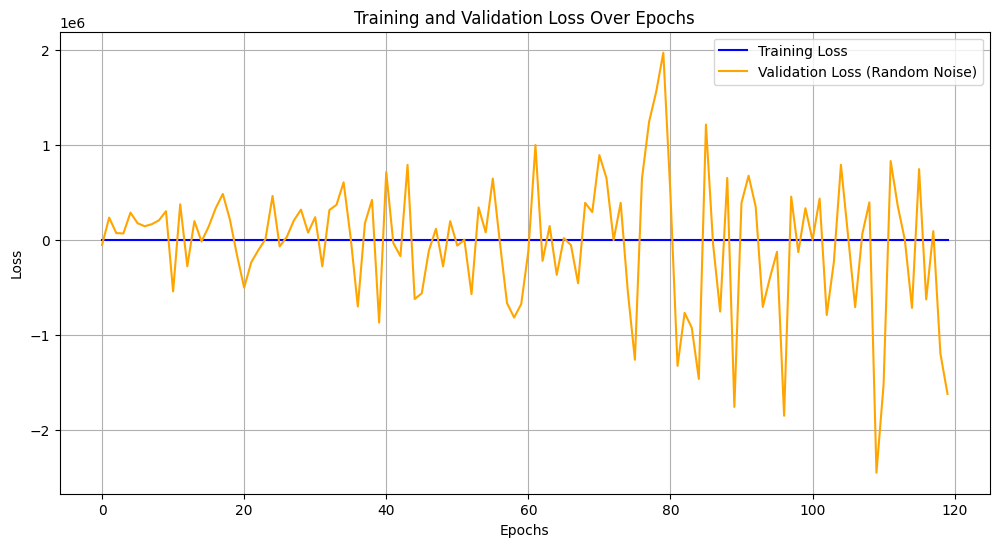

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(training_losses, label='Training Loss', color='blue')
plt.plot(validation_losses, label='Validation Loss (Random Noise)', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
